In [ ]:
! pip install --quiet "urllib3" "pytorch-lightning>=1.4, <2.1.0" "setuptools==67.7.2" "torch>=1.8.1, <2.1.0" "torchmetrics>=0.7, <0.12" "matplotlib>=3.0.0, <3.8.0" "ipython[notebook]>=8.0.0, <8.14.0" "lightning>=2.0.0rc0" "matplotlib"

In [ ]:
import time

import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
from matplotlib.colors import to_rgba
from torch import Tensor
from tqdm.notebook import tqdm  # Progress bar

matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export

In [ ]:
print("Using torch", torch.__version__)

Using torch 2.0.1+cu118


### Тензоры


In [ ]:
x = Tensor(2, 3, 4)
print(x)

tensor([[[-5.6481e+02,  4.5818e-41,  0.0000e+00,  0.0000e+00],
         [ 1.4013e-45,  0.0000e+00,  1.2810e-34,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 4.1216e-35,  0.0000e+00,  1.5817e-35,  0.0000e+00],
         [-1.2842e+13,  4.5818e-41,  1.4013e-45,  0.0000e+00],
         [ 3.0829e-44,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])


In [ ]:

x = Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:

x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.3768, 0.6951, 0.3462, 0.4157],
         [0.1533, 0.2404, 0.0081, 0.9509],
         [0.3383, 0.9279, 0.9881, 0.4599]],

        [[0.3467, 0.8705, 0.2348, 0.9923],
         [0.8201, 0.9465, 0.5365, 0.2300],
         [0.8573, 0.6190, 0.6361, 0.2774]]])


In [ ]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


#### Tensor в Numpy, и Numpy в Tensor



In [ ]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


In [ ]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


#### Операции


In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1630, 0.1581, 0.1296],
        [0.0488, 0.8344, 0.4976]])
X2 tensor([[0.4140, 0.5681, 0.3120],
        [0.5110, 0.0917, 0.1197]])
Y tensor([[0.5770, 0.7262, 0.4416],
        [0.5598, 0.9261, 0.6173]])


In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.0147, 0.8658, 0.7572],
        [0.3502, 0.1745, 0.1207]])
X2 (before) tensor([[0.8851, 0.0843, 0.4493],
        [0.7686, 0.1414, 0.2033]])
X1 (after) tensor([[0.0147, 0.8658, 0.7572],
        [0.3502, 0.1745, 0.1207]])
X2 (after) tensor([[0.8999, 0.9501, 1.2065],
        [1.1189, 0.3158, 0.3240]])


In [ ]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [ ]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
x = x.permute(1, 0)  
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
W = torch.arange(9).view(3, 3)  
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
h = torch.matmul(x, W)  
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


#### Индексирование



In [ ]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
print(x[:, 1])   

tensor([1, 5, 9])


In [ ]:
print(x[0])   

tensor([0, 1, 2, 3])


In [ ]:
print(x[:2, -1])  

tensor([3, 7])


In [ ]:
print(x[1:3, :])   

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Dynamic Computation Graph и Backpropagation


In [ ]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) 
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [ ]:
a = x + 2
b = a**2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)




<center style="width: 100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/pytorch_computation_graph.svg" width="200px"></center>



In [ ]:
y.backward()

In [ ]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


### GPU support



In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? False


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


In [ ]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
x = torch.randn(5000, 5000)

# CPU версия
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU версия
if torch.cuda.is_available():
    x = x.to(device)
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")   

CPU time: 4.03986s


In [ ]:

if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Непрерывный XOR
<div class="center-wrapper"><div class="video-wrapper"><iframe src="https://www.youtube.com/embed/schbjeU5X2g" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></div></div>



<center style="width: 100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/continuous_xor.svg" width="350px"></center>

#### nn.Module


In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        

    def forward(self, x):
        
        pass



#### Простой классификатор


<center width="100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/small_neural_network.svg" width="300px"></center>


In [ ]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)

print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [ ]:


class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        """XORDataset.

        Args:
            size: Number of data points we want to generate
            std: Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        
        return self.size

    def __getitem__(self, idx):
        
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [ ]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([1.0799, 1.0889]), tensor(0))


In [ ]:
def visualize_samples(data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

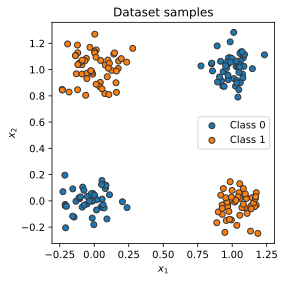

In [ ]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [ ]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [ ]:

data_inputs, data_labels = next(iter(data_loader))

print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 0.8878, -0.1663],
        [ 0.0462,  1.0694],
        [ 0.0559,  0.8531],
        [ 0.9696,  1.0410],
        [ 0.2352,  1.0569],
        [-0.0248,  0.9887],
        [ 0.0845,  0.1184],
        [ 0.1025,  1.0109]])
Data labels torch.Size([8]) 
 tensor([1, 1, 1, 0, 1, 1, 0, 1])


### Оптимизация



In [ ]:
loss_module = nn.BCEWithLogitsLoss()

In [ ]:

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:

model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    model.train()

    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  

            
            loss = loss_module(preds, data_labels.float())

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

In [ ]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

#### Сохранение модели



In [ ]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-2.4665,  2.4063],
        [-0.1186, -0.3029],
        [ 1.7668, -1.8578],
        [-0.3360,  0.2226]])), ('linear1.bias', tensor([-1.3082,  1.1347, -0.8889, -0.4740])), ('linear2.weight', tensor([[ 2.7927,  0.8784,  2.4253, -0.6335]])), ('linear2.bias', tensor([1.3464]))])


In [ ]:

torch.save(state_dict, "our_model.tar")

In [ ]:

state_dict = torch.load("our_model.tar")


new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)


print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-2.4665,  2.4063],
        [-0.1186, -0.3029],
        [ 1.7668, -1.8578],
        [-0.3360,  0.2226]])), ('linear1.bias', tensor([-1.3082,  1.1347, -0.8889, -0.4740])), ('linear2.weight', tensor([[ 2.7927,  0.8784,  2.4253, -0.6335]])), ('linear2.bias', tensor([1.3464]))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-2.4665,  2.4063],
        [-0.1186, -0.3029],
        [ 1.7668, -1.8578],
        [-0.3360,  0.2226]])), ('linear1.bias', tensor([-1.3082,  1.1347, -0.8889, -0.4740])), ('linear2.weight', tensor([[ 2.7927,  0.8784,  2.4253, -0.6335]])), ('linear2.bias', tensor([1.3464]))])


In [ ]:
test_dataset = XORDataset(size=500)
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [ ]:
def eval_model(model, data_loader):
    model.eval()  
    true_preds, num_preds = 0.0, 0.0

    with torch.no_grad():  
        for data_inputs, data_labels in data_loader:
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)  
            pred_labels = (preds >= 0.5).long()

            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [ ]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


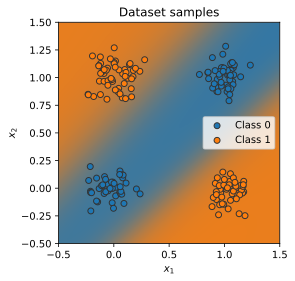

In [ ]:
@torch.no_grad()  
def visualize_classification(model, data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    model.to(device)
    c0 = Tensor(to_rgba("C0")).to(device)
    c1 = Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2) 
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)


visualize_classification(model, dataset.data, dataset.label)
plt.show()